In [34]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()

df = pd.read_stata('pwt91.dta')

df = df[df['year']==2017]

df['gdppc'] = df['rgdpo']/df['pop']
df['cons'] = df['ccon']/df['pop']
df['prod'] = df['rgdpo']/(df['avh']*df['emp'])

df.dropna(subset=['prod','gdppc'],inplace=True)

df.head()

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,...,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k,gdppc,cons,prod
407,ARG,Argentina,Argentine Peso,2017,7.424861e+05,7.289994e+05,44.271042,19.814985,1691.536255,3.035439,...,0.787924,1.064745,1.029326,0.662490,0.653455,0.633551,1.296539,16466.732422,14498.951172,21.749641
611,AUS,Australia,Australian Dollar,2017,1.177098e+06,1.158776e+06,24.450562,12.259081,1731.494263,3.522481,...,1.177875,1.192608,1.412565,0.640129,0.689741,1.057235,0.898940,47392.625000,35314.972656,54.590946
679,AUT,Austria,Euro,2017,4.500890e+05,4.027329e+05,8.735453,4.346900,1613.051880,3.358983,...,0.910282,0.835754,1.284974,0.703773,0.641590,0.705502,0.632267,46103.269531,34516.828125,57.436657
883,BEL,Belgium,Euro,2017,5.317196e+05,4.382108e+05,11.429336,4.757217,1544.269043,3.136449,...,0.923156,0.789507,1.293465,0.701457,0.648746,0.640535,0.586094,38340.886719,31699.187500,59.649551
1087,BGD,Bangladesh,Taka,2017,5.689508e+05,5.658139e+05,164.669754,63.779919,2232.354248,2.048752,...,0.426683,0.509377,0.378525,0.656377,0.633446,0.284944,NaN,3436.052490,2637.138916,3.973988


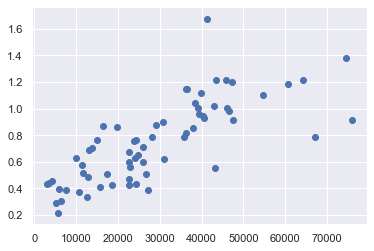

In [44]:
plt.scatter(df['gdppc'],df['pl_gdpo'])

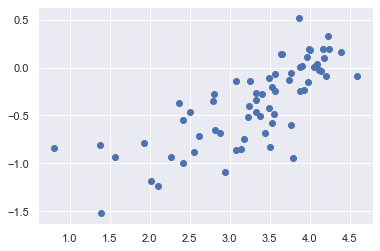

In [37]:
plt.scatter(np.log(df['prod']),np.log(df['pl_gdpo']))

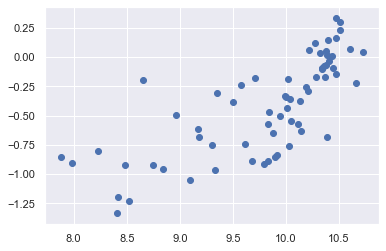

In [36]:
plt.scatter(np.log(df['cons']),np.log(df['pl_c']))

In [41]:
import statsmodels.formula.api as smf

res = smf.rlm('np.log(pl_gdpo) ~ np.log(prod)',data=df).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:        np.log(pl_gdpo)   No. Observations:                   66
Model:                            RLM   Df Residuals:                       64
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 19 Feb 2020                                         
Time:                        19:25:24                                         
No. Iterations:                    20                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -1.7651      0.146    -12.069      0.000      -2.052      -1.478
np.log(prod)     0.4242      0.043      9.834      0.000       0.340       0.509
================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [43]:
res1 = smf.ols('np.log(pl_gdpo) ~ np.log(gdppc)',data=df).fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.log(pl_gdpo)   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     99.24
Date:                Wed, 19 Feb 2020   Prob (F-statistic):           1.23e-14
Time:                        19:25:34   Log-Likelihood:                -7.1197
No. Observations:                  66   AIC:                             18.24
Df Residuals:                      64   BIC:                             22.62
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -4.8647      0.452    -10.763      0.000      -5.768      -3.962
np.log(gdppc)     0.4467      0.045      9.962      0.000       0.357       0.536
==============================================================================
Omnibus:                        1.563   Durbin-Watson:                   1.596
Prob(Omnibus):                  0.458   Jarque-Bera (JB):                1.564
Skew:                          -0.303   Prob(JB):                        0.457
Kurtosis:                       2.551   Cond. No.                         137.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
[i for i in df.columns]

['countrycode',
 'country',
 'currency_unit',
 'year',
 'rgdpe',
 'rgdpo',
 'pop',
 'emp',
 'avh',
 'hc',
 'ccon',
 'cda',
 'cgdpe',
 'cgdpo',
 'cn',
 'ck',
 'ctfp',
 'cwtfp',
 'rgdpna',
 'rconna',
 'rdana',
 'rnna',
 'rkna',
 'rtfpna',
 'rwtfpna',
 'labsh',
 'irr',
 'delta',
 'xr',
 'pl_con',
 'pl_da',
 'pl_gdpo',
 'i_cig',
 'i_xm',
 'i_xr',
 'i_outlier',
 'i_irr',
 'cor_exp',
 'statcap',
 'csh_c',
 'csh_i',
 'csh_g',
 'csh_x',
 'csh_m',
 'csh_r',
 'pl_c',
 'pl_i',
 'pl_g',
 'pl_x',
 'pl_m',
 'pl_n',
 'pl_k',
 'gdppc',
 'prod']